In [1]:
import numpy as np

In [2]:
!pip3 install scipy matplotlib sympy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import scipy.linalg as sla


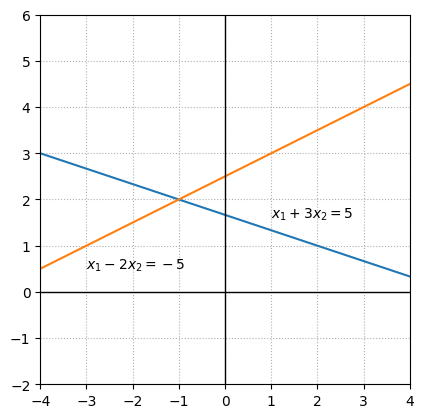

In [4]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5,5,100)

fig, ax = plt.subplots()
ax.plot(x,(5-x)/3)
ax.plot(x,(5+x)/2)

ax.text(1,1.6,'$x_1+3x_2 = 5$')
ax.text(-3,0.5,'$x_1-2x_2 = -5$')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

## This options specifies the ticks based the list of numbers provided.
ax.set_xticks(list(range(-4,5)))
ax.set_aspect('equal')
ax.grid(True,ls=':')

In [5]:
# https://bvanderlei.github.io/jupyter-guide-to-linear-algebra/Gaussian_Elimination.html
import numpy as np
A=np.array([[1,-1,1,3],[2,1,8,18],[4,2,-3,-2]])

def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================

    # https://numpy.org/doc/stable/reference/generated/numpy.shape.html#numpy.shape
    m, n = A.shape # shape of A is m rows by n columns
    B = np.copy(A).astype('float64')
        
    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp
        
    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m, n = A.shape # A is m by n
    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale
        
    return B

# 将第k行乘以scale, 然后加到第l行上
# l = k * scale
def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to 
#     the values of row k, multiplied by scale.
# =============================================================================
    m, n = A.shape # A is m by n
    B = np.copy(A).astype('float64')
        
    for j in range(n):
        B[l][j] += B[k][j]*scale
        
    return B

B1 = RowSwap(A,0,2)
B2 = RowScale(A,2,0.5)
B3 = RowAdd(A,0,1,2)

print(A)
print(B1)
print(B2)
print(B3)

[[ 1 -1  1  3]
 [ 2  1  8 18]
 [ 4  2 -3 -2]]
[[ 4.  2. -3. -2.]
 [ 2.  1.  8. 18.]
 [ 1. -1.  1.  3.]]
[[ 1.  -1.   1.   3. ]
 [ 2.   1.   8.  18. ]
 [ 2.   1.  -1.5 -1. ]]
[[ 1. -1.  1.  3.]
 [ 4. -1. 10. 24.]
 [ 4.  2. -3. -2.]]


In [6]:
## Add -2 times row 0 to row 1
A1 = RowAdd(A,0,1,-2)
print(A1,'\n')

## Add -4 times row 0 to row 2
A2 = RowAdd(A1,0,2,-4)
print(A2,'\n')

## Add -2 times row 1 to row 2
A3 = RowAdd(A2,1,2,-2)
print(A3,'\n')

## Multiply row 1 by 1/3
A4 = RowScale(A3,1,1.0/3)
print(A4,'\n')

## Multiply row 2 by 1/19
A5 = RowScale(A4,2,1.0/-19.)
print(A5)


[[ 1. -1.  1.  3.]
 [ 0.  3.  6. 12.]
 [ 4.  2. -3. -2.]] 

[[  1.  -1.   1.   3.]
 [  0.   3.   6.  12.]
 [  0.   6.  -7. -14.]] 

[[  1.  -1.   1.   3.]
 [  0.   3.   6.  12.]
 [  0.   0. -19. -38.]] 

[[  1.  -1.   1.   3.]
 [  0.   1.   2.   4.]
 [  0.   0. -19. -38.]] 

[[ 1. -1.  1.  3.]
 [ 0.  1.  2.  4.]
 [-0. -0.  1.  2.]]


In [7]:
R = np.array([
    [-7 , 1,  5, -1],
    [-2 ,-4,  4,  5],
    [ 3,  4 , 1, -1]
])
print(R)

R1 = RowScale(R,0,1.0/R[0][0])
print(R1)

R2 = RowAdd(R1,0,1,-R[1][0])
print(R2)

R3 = RowAdd(R2,0,2,-R2[2][0])
print(R3)

R4 = RowScale(R3,1,1.0/R3[1][1])
print(R4)

R5 = RowAdd(R4,1,2,-R4[2][1])
print(R5)

R6 = RowScale(R5,2,1.0/R5[2][2])
print(R6)

[[-7  1  5 -1]
 [-2 -4  4  5]
 [ 3  4  1 -1]]
[[ 1.         -0.14285714 -0.71428571  0.14285714]
 [-2.         -4.          4.          5.        ]
 [ 3.          4.          1.         -1.        ]]
[[ 1.         -0.14285714 -0.71428571  0.14285714]
 [ 0.         -4.28571429  2.57142857  5.28571429]
 [ 3.          4.          1.         -1.        ]]
[[ 1.         -0.14285714 -0.71428571  0.14285714]
 [ 0.         -4.28571429  2.57142857  5.28571429]
 [ 0.          4.42857143  3.14285714 -1.42857143]]
[[ 1.         -0.14285714 -0.71428571  0.14285714]
 [-0.          1.         -0.6        -1.23333333]
 [ 0.          4.42857143  3.14285714 -1.42857143]]
[[ 1.         -0.14285714 -0.71428571  0.14285714]
 [-0.          1.         -0.6        -1.23333333]
 [ 0.          0.          5.8         4.03333333]]
[[ 1.         -0.14285714 -0.71428571  0.14285714]
 [-0.          1.         -0.6        -1.23333333]
 [ 0.          0.          1.          0.6954023 ]]


In [8]:
A = np.array([[5, 4, 0],[1, 8, 3],[6, 7, 2]])

## Note that the tranpose method must be called with (), the same as a function with no arguments.
A_T = A.transpose()

print(A)
print('\n')
print(A_T)

[[5 4 0]
 [1 8 3]
 [6 7 2]]


[[5 1 6]
 [4 8 7]
 [0 3 2]]


In [9]:
I5 = np.eye(10)
print(I5)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
P = np.array([[1, 3, -2],[5, 2, 0],[4, 2, -1],[2, 2, 0]])
C = np.array([[0, 6, 2, 6],[-1, 1, -3, 4],[0, 2, 4, 8]])
X = C[0:3,2:3] # 左包含，右不包含
print(P,'\n')
print(C,'\n')
print(C[0:3,2:3],'\n') # 左包含，右不包含
print(C[0:3,2:4],'\n') # 左包含，右不包含
print(P@X) # In NumPy, the @ operator means matrix multiplication

[[ 1  3 -2]
 [ 5  2  0]
 [ 4  2 -1]
 [ 2  2  0]] 

[[ 0  6  2  6]
 [-1  1 -3  4]
 [ 0  2  4  8]] 

[[ 2]
 [-3]
 [ 4]] 

[[ 2  6]
 [-3  4]
 [ 4  8]] 

[[-15]
 [  4]
 [ -2]
 [ -2]]


In [11]:
A = np.array([[0.2,0.2],[0.1,0.5]])
print(A@A)

[[0.06 0.14]
 [0.07 0.27]]


In [12]:
A = np.random.randint(-5,5,size=(3,3))
B = np.random.randint(-5,5,size=(3,3))

print(A)
print(B)
print(A@B)
print('\n')
print(B@A)


[[-3  0  1]
 [-5  0  4]
 [ 1 -1 -4]]
[[-2  1  2]
 [-4  2 -3]
 [ 4 -5 -5]]
[[ 10  -8 -11]
 [ 26 -25 -30]
 [-14  19  25]]


[[ 3 -2 -6]
 [-1  3 16]
 [ 8  5  4]]


In [13]:
A = np.array([[0.2,0.2],[0.1,0.5]])
print(A)
# print(A@A)

r = np.array([[1],[1]])
r_T = r.transpose()

tr_A = np.diagonal(A).sum()
print(tr_A)
KC = (tr_A - r_T@A@A@r) / (1 - r_T@A@A@r)
print(KC)


[[0.2 0.2]
 [0.1 0.5]]
0.7
[[0.34782609]]


In [14]:
A = np.array([[0.3,0.1],[0.2,0.4]])
print(A)
# print(A@A)

r = np.array([[1],[1]])
r_T = r.transpose()

tr_A = np.diagonal(A).sum()
print(tr_A)
KC = (tr_A - r_T@A@A@r) / (1 - r_T@A@A@r)
print(KC)


[[0.3 0.1]
 [0.2 0.4]]
0.7
[[0.4]]


In [15]:
from numpy import array
from scipy.linalg import lu

a = array([
    [2.,4.,4.,4.],
    [1.,2.,3.,3.],
    [1.,2.,2.,2.],
    [1.,4.,3.,4.]
])

pl, u = lu(a, permute_l=True)
# print(pl)
print(u)

[[2. 4. 4. 4.]
 [0. 2. 1. 2.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]]


In [16]:
from numpy import array
from scipy.linalg import lu

a = array([
    [1,5,3,3],
    [2,8,5,9],
    [1,1,1,9],
])

pl, u = lu(a, permute_l=True)
# print(pl)
print(u)

[[ 2.   8.   5.   9. ]
 [ 0.  -3.  -1.5  4.5]
 [ 0.   0.   0.   0. ]]


In [17]:
from numpy import array
from scipy.linalg import lu

a = array([
    [1,2,3],
    [2,4,6],
    [3,6,9],
])

pl, u = lu(a, permute_l=True)
# print(pl)
print(u)

[[3. 6. 9.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [18]:
from numpy import array
from scipy.linalg import lu

a = array([
    [1,2,3,5],
    [1,6,7,9],
    [1,10,6,8],
])

pl, u = lu(a, permute_l=True)
# print(pl)
print(u)

[[1.  2.  3.  5. ]
 [0.  8.  3.  3. ]
 [0.  0.  2.5 2.5]]


In [19]:
a = array([
    [1,2,3,1],
    [1,-4,-1,-1],
    [2,1,4,1],
    [1,-1,1,0],
])

pl, u = lu(a, permute_l=True)
# print(pl)
print(u)

[[ 2.   1.   4.   1. ]
 [ 0.  -4.5 -3.  -1.5]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]


In [20]:
import sympy as sp

m = sp.Matrix([[1,2,1],
           [-2,-3,1],
           [3,5,0]])

m_rref, pivots = m.rref() # Compute reduced row echelon form (rref).

print(m_rref, pivots)

Matrix([[1, 0, -5], [0, 1, 3], [0, 0, 0]]) (0, 1)


In [22]:
# 初等矩阵

from numpy import array

# 置换阵
m_row_swap = array([
    [0,1,0],
    [1,0,0],
    [0,0,1],
])

m_row_scale = array([
    [1,0,0],
    [0,3,0],
    [0,0,1],
])

m_row_add = array([
    [1,0,0],
    [3,1,0],
    [0,0,1],
])

R = array([
    [-7 , 1,  5, -1],
    [-2 ,-4,  4,  5],
    [ 3,  4 , 1, -1]
])
print(R)

print(m_row_swap@R)  # 左乘置换阵，相当于行交换操作
print(m_row_scale@R) # 左乘数乘阵，相当于行数乘操作
print(m_row_add@R)   # 左乘倍加阵，相当于倍加操作

[[-7  1  5 -1]
 [-2 -4  4  5]
 [ 3  4  1 -1]]
[[-2 -4  4  5]
 [-7  1  5 -1]
 [ 3  4  1 -1]]
[[ -7   1   5  -1]
 [ -6 -12  12  15]
 [  3   4   1  -1]]
[[ -7   1   5  -1]
 [-23  -1  19   2]
 [  3   4   1  -1]]


In [35]:
from numpy import array
from numpy import linalg

def print_matrix_and_inv(a):
    print(a)
    print(linalg.inv(a))
    

A = array([
    [1,1,2],
    [1,2,3],
    [2,4,5],
])
print_matrix_and_inv(A)

B = array([[1,3,5],[2,4,6],[1,4,9]])
print_matrix_and_inv(B)

C = array([[2,0,0],[0,3,0],[0,0,4]])
print_matrix_and_inv(C)

print(linalg.matrix_rank(A))
print(linalg.matrix_rank(B))
print(linalg.matrix_rank(C))

[[1 1 2]
 [1 2 3]
 [2 4 5]]
[[ 2. -3.  1.]
 [-1. -1.  1.]
 [ 0.  2. -1.]]
[[1 3 5]
 [2 4 6]
 [1 4 9]]
[[-3.    1.75  0.5 ]
 [ 3.   -1.   -1.  ]
 [-1.    0.25  0.5 ]]
[[2 0 0]
 [0 3 0]
 [0 0 4]]
[[0.5        0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.         0.25      ]]
3
3
3


In [34]:
from numpy import array
from numpy import linalg

A = array([
    [1,1,2],
    [1,2,3],
])
print(linalg.inv(A))


LinAlgError: Last 2 dimensions of the array must be square